In [21]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Data import

In [22]:
df=pd.read_csv("./UDEMY_TSA_FINAL/07-Deep-Learning-Models/MultiVariate-RNN-with-TensorFlow-and-Keras-master/DATA/energydata_complete.csv",index_col="date",infer_datetime_format=True)

In [23]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

<AxesSubplot:xlabel='date'>

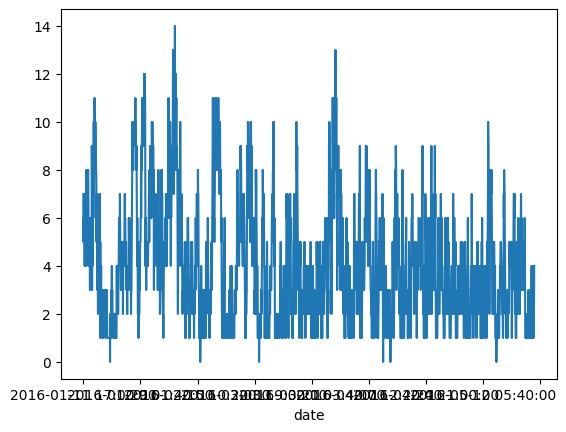

In [25]:
df["Windspeed"].plot()

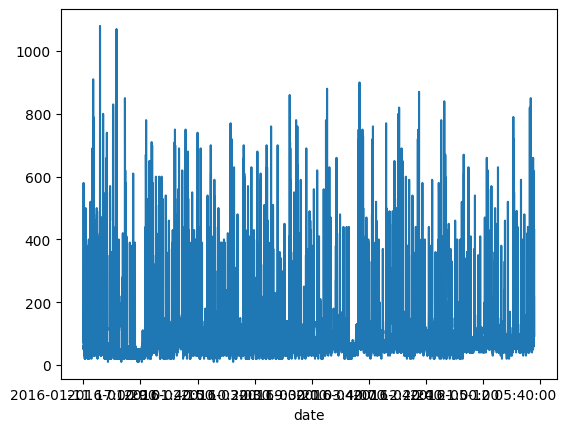

In [26]:
df["Appliances"].plot();

#### Split train test

In [27]:
len(df)

19735

In [28]:
df.head(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [29]:
df.tail(5)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


#### we want to predict 24 hrs of the future, save some training and only select last months of data to get 24 hrs

In [30]:
df.loc["2016-05-01":]

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.200000,38.200000,18.390000,41.400000,23.200000,36.400000,19.73,37.730000,...,19.166667,38.200000,4.300000,763.700000,86.000000,2.000000,40.000000,2.200000,15.310003,15.310003
2016-05-01 00:10:00,60,0,21.150000,38.172500,18.390000,41.500000,23.133333,36.466667,19.70,37.663333,...,19.133333,38.290000,4.283333,763.716667,86.333333,2.166667,38.166667,2.216667,11.240067,11.240067
2016-05-01 00:20:00,50,0,21.133333,38.090000,18.323333,41.500000,23.200000,36.500000,19.70,37.590000,...,19.133333,38.363333,4.266667,763.733333,86.666667,2.333333,36.333333,2.233333,21.808814,21.808814
2016-05-01 00:30:00,50,0,21.100000,38.090000,18.290000,41.500000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.500000,4.250000,763.750000,87.000000,2.500000,34.500000,2.250000,47.000534,47.000534
2016-05-01 00:40:00,60,0,21.100000,38.030000,18.290000,41.560000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.633333,4.233333,763.766667,87.333333,2.666667,32.666667,2.266667,8.059441,8.059441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.70,45.590000,...,23.200000,46.790000,22.733333,755.200000,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.70,45.590000,...,23.200000,46.790000,22.600000,755.200000,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.70,45.730000,...,23.200000,46.790000,22.466667,755.200000,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [31]:
df=df.loc["2016-05-01":]

In [32]:
df=df.round(2)

In [33]:
len(df)

3853

In [34]:
#### calcualte how many data per day
24*60/10

144.0

In [35]:
test_days=2

In [36]:
test_daydata=test_days*144

In [37]:
test_daydata

288

In [38]:
train=df.iloc[:-test_daydata]
test=df.iloc[-test_daydata:]

In [41]:
train

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.20,38.20,18.39,41.40,23.20,36.40,19.73,37.73,...,19.17,38.20,4.30,763.70,86.00,2.00,40.00,2.20,15.31,15.31
2016-05-01 00:10:00,60,0,21.15,38.17,18.39,41.50,23.13,36.47,19.70,37.66,...,19.13,38.29,4.28,763.72,86.33,2.17,38.17,2.22,11.24,11.24
2016-05-01 00:20:00,50,0,21.13,38.09,18.32,41.50,23.20,36.50,19.70,37.59,...,19.13,38.36,4.27,763.73,86.67,2.33,36.33,2.23,21.81,21.81
2016-05-01 00:30:00,50,0,21.10,38.09,18.29,41.50,23.20,36.50,19.70,37.50,...,19.17,38.50,4.25,763.75,87.00,2.50,34.50,2.25,47.00,47.00
2016-05-01 00:40:00,60,0,21.10,38.03,18.29,41.56,23.20,36.50,19.70,37.50,...,19.17,38.63,4.23,763.77,87.33,2.67,32.67,2.27,8.06,8.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-25 17:20:00,120,0,24.50,37.22,24.13,34.30,25.20,37.64,24.36,38.29,...,21.89,37.03,16.17,756.17,52.67,1.33,31.33,6.43,33.46,33.46
2016-05-25 17:30:00,190,0,24.50,37.16,24.10,34.30,25.20,37.55,24.29,38.16,...,21.89,37.20,16.25,756.15,53.50,1.50,33.50,6.75,0.43,0.43
2016-05-25 17:40:00,160,0,24.50,37.43,24.10,34.43,25.14,37.28,24.29,38.00,...,21.89,37.33,16.33,756.13,54.33,1.67,35.67,7.07,16.67,16.67


In [40]:
test

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.50,37.86,24.00,34.27,25.00,36.70,24.29,37.79,...,22.00,37.23,16.48,756.1,55.83,2.00,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.50,37.30,23.86,34.33,24.94,36.67,24.29,37.79,...,22.00,37.36,16.47,756.1,55.67,2.00,36.33,7.53,31.16,31.16
2016-05-25 18:30:00,120,0,24.50,36.96,23.73,34.33,24.85,36.50,24.29,37.79,...,22.03,37.39,16.45,756.1,55.50,2.00,34.50,7.45,4.40,4.40
2016-05-25 18:40:00,120,0,24.50,37.00,23.70,34.40,24.84,36.45,24.29,37.90,...,22.10,37.72,16.43,756.1,55.33,2.00,32.67,7.37,27.12,27.12
2016-05-25 18:50:00,120,0,24.49,37.07,23.68,34.52,24.84,36.49,24.28,37.93,...,22.10,37.81,16.42,756.1,55.17,2.00,30.83,7.28,10.27,10.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,...,23.20,46.79,22.73,755.2,55.67,3.33,23.67,13.33,43.10,43.10
2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,...,23.20,46.79,22.60,755.2,56.00,3.50,24.50,13.30,49.28,49.28
2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,...,23.20,46.79,22.47,755.2,56.33,3.67,25.33,13.27,29.20,29.20


#### Scale Data

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler=MinMaxScaler()

In [45]:
scaler.fit(train)

MinMaxScaler()

In [46]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

#### Time Series Generator

In [47]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [48]:
## define generator
length=144
batch_size=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [49]:
len(scaled_train)

3565

In [50]:
len(generator)

3421

In [52]:
X,y=generator[0]

In [53]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03896104 0.         0.13798978 ... 0.14319527 0.75185111 0.75185111]
Predict this y: 
 [[0.03896104 0.         0.30834753 0.29439421 0.16038492 0.49182278
  0.0140056  0.36627907 0.24142857 0.24364791 0.12650602 0.36276002
  0.12       0.28205572 0.06169297 0.15759185 0.34582624 0.39585974
  0.09259259 0.39649608 0.18852459 0.96052632 0.59210526 0.1
  0.58333333 0.13609467 0.4576746  0.4576746 ]]


#### MODEL

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [55]:
scaled_train.shape

(3565, 28)

In [58]:
### define model
model=Sequential()

model.add(LSTM(100,input_shape=(length,scaled_train.shape[1])))

model.add(Dense(scaled_train.shape[1]))

model.compile(optimizer="adam",loss="mse")

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               51600     
                                                                 
 dense (Dense)               (None, 28)                2828      
                                                                 
Total params: 54,428
Trainable params: 54,428
Non-trainable params: 0
_________________________________________________________________


#### Define Early Stopping

In [60]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",patience=1)

validation_gen=TimeseriesGenerator(scaled_test,scaled_test,
                                   length=length,batch_size=batch_size)

In [61]:
model.fit_generator(generator,epochs=10,
                    validation_data=validation_gen,
                    callbacks=[early_stop])

C:\Users\Selim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
3421/3421 [==============================] - 219s 63ms/step - loss: 0.0118 - val_loss: 0.0102
Epoch 2/10
3421/3421 [==============================] - 215s 63ms/step - loss: 0.0079 - val_loss: 0.0087
Epoch 3/10
3421/3421 [==============================] - 215s 63ms/step - loss: 0.0076 - val_loss: 0.0087


In [62]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

<AxesSubplot:>

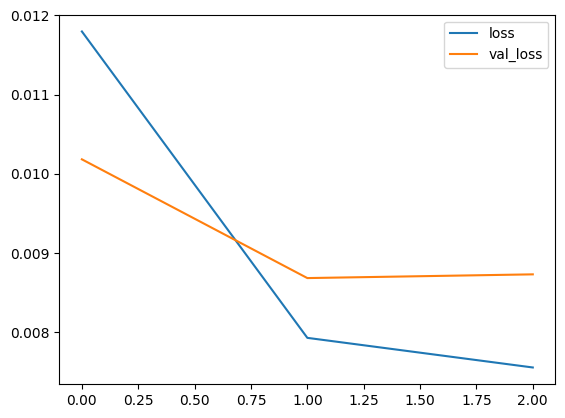

In [63]:
losses=pd.DataFrame(model.history.history)
losses.plot()

#### Evaluate the Test Data

In [64]:
first_eval_batch=scaled_train[-length:]
first_eval_batch

array([[0.1038961 , 0.        , 0.72231687, ..., 0.53550296, 0.15909546,
        0.15909546],
       [0.11688312, 0.        , 0.73424191, ..., 0.52662722, 0.40344207,
        0.40344207],
       [0.11688312, 0.        , 0.73424191, ..., 0.51775148, 0.20452271,
        0.20452271],
       ...,
       [0.18181818, 0.        , 0.70017036, ..., 0.50118343, 0.33340004,
        0.33340004],
       [0.09090909, 0.        , 0.70017036, ..., 0.51952663, 0.78747248,
        0.78747248],
       [0.1038961 , 0.        , 0.70017036, ..., 0.53846154, 0.77286372,
        0.77286372]])

In [65]:
first_eval_batch=first_eval_batch.reshape((1,length,scaled_train.shape[1]))

In [66]:
model.predict(first_eval_batch)

array([[0.09358841, 0.02594478, 0.70105714, 0.3971702 , 0.55133545,
        0.4242429 , 0.42386836, 0.40706465, 0.7242071 , 0.3782274 ,
        0.292773  , 0.35606992, 0.62442076, 0.01770609, 0.63216877,
        0.37812835, 0.51415753, 0.3088173 , 0.57627404, 0.33489344,
        0.61030924, 0.5363808 , 0.4244176 , 0.2179744 , 0.5798987 ,
        0.5189566 , 0.5042424 , 0.51323813]], dtype=float32)

In [67]:
scaled_test[0]

array([0.19480519, 0.        , 0.70017036, 0.3920434 , 0.53007217,
       0.41064526, 0.40616246, 0.41913319, 0.72714286, 0.4115245 ,
       0.30722892, 0.36445121, 0.66777778, 0.        , 0.61119082,
       0.39840637, 0.51618399, 0.32953105, 0.53703704, 0.34024896,
       0.6057377 , 0.52631579, 0.41881579, 0.2       , 0.55283333,
       0.53372781, 0.76305783, 0.76305783])

In [68]:
### prediction

In [69]:
n_features=scaled_train.shape[1]
test_predictions=[]

first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

    current_pred=model.predict(current_batch)[0]

    test_predictions.append(current_pred)

    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [70]:
test_predictions

[array([0.09358841, 0.02594478, 0.70105714, 0.3971702 , 0.55133545,
        0.4242429 , 0.42386836, 0.40706465, 0.7242071 , 0.3782274 ,
        0.292773  , 0.35606992, 0.62442076, 0.01770609, 0.63216877,
        0.37812835, 0.51415753, 0.3088173 , 0.57627404, 0.33489344,
        0.61030924, 0.5363808 , 0.4244176 , 0.2179744 , 0.5798987 ,
        0.5189566 , 0.5042424 , 0.51323813], dtype=float32),
 array([0.07883   , 0.03112135, 0.70288736, 0.3875416 , 0.5553736 ,
        0.41560853, 0.42448813, 0.39322975, 0.72863317, 0.36169225,
        0.29524466, 0.33774638, 0.5998076 , 0.03661553, 0.64153695,
        0.36147088, 0.52118933, 0.29971468, 0.59943426, 0.32781586,
        0.6048404 , 0.5368926 , 0.42792726, 0.23359281, 0.5713715 ,
        0.5071423 , 0.5062571 , 0.5162607 ], dtype=float32),
 array([0.07267093, 0.0313978 , 0.7014343 , 0.3728276 , 0.5560774 ,
        0.40467012, 0.4252747 , 0.3779858 , 0.7341738 , 0.345715  ,
        0.2987028 , 0.31969386, 0.57804716, 0.05547524, 0.6495

In [71]:
scaled_test

array([[0.19480519, 0.        , 0.70017036, ..., 0.53372781, 0.76305783,
        0.76305783],
       [0.37662338, 0.        , 0.70017036, ..., 0.52840237, 0.62337402,
        0.62337402],
       [0.12987013, 0.        , 0.70017036, ..., 0.52366864, 0.08785271,
        0.08785271],
       ...,
       [0.32467532, 0.33333333, 0.87052811, ..., 0.86804734, 0.58415049,
        0.58415049],
       [0.51948052, 0.33333333, 0.87052811, ..., 0.86568047, 0.12627577,
        0.12627577],
       [0.53246753, 0.33333333, 0.87052811, ..., 0.86390533, 0.68260957,
        0.68260957]])

#### Inverse transformations and compare

In [72]:
true_preds=scaler.inverse_transform(test_predictions)

In [73]:
true_preds

array([[ 92.06307709,   0.77834353,  24.50520539, ...,   7.37036657,
         25.20699374,  25.65650946],
       [ 80.69910288,   0.93364041,  24.51594878, ...,   7.17070496,
         25.30766813,  25.80754636],
       [ 75.95661543,   0.94193392,  24.50741942, ...,   6.94314214,
         25.4543565 ,  25.87972597],
       ...,
       [ -4.20602694, -17.58002758,  26.81356708, ...,  -3.75927742,
         18.43601635,  20.81218331],
       [ -4.20600686, -17.58002758,  26.81356708, ...,  -3.75927792,
         18.43601337,  20.81218331],
       [ -4.20600686, -17.58002758,  26.81356778, ...,  -3.75927843,
         18.43601635,  20.81218033]])

In [74]:
test

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.50,37.86,24.00,34.27,25.00,36.70,24.29,37.79,...,22.00,37.23,16.48,756.1,55.83,2.00,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.50,37.30,23.86,34.33,24.94,36.67,24.29,37.79,...,22.00,37.36,16.47,756.1,55.67,2.00,36.33,7.53,31.16,31.16
2016-05-25 18:30:00,120,0,24.50,36.96,23.73,34.33,24.85,36.50,24.29,37.79,...,22.03,37.39,16.45,756.1,55.50,2.00,34.50,7.45,4.40,4.40
2016-05-25 18:40:00,120,0,24.50,37.00,23.70,34.40,24.84,36.45,24.29,37.90,...,22.10,37.72,16.43,756.1,55.33,2.00,32.67,7.37,27.12,27.12
2016-05-25 18:50:00,120,0,24.49,37.07,23.68,34.52,24.84,36.49,24.28,37.93,...,22.10,37.81,16.42,756.1,55.17,2.00,30.83,7.28,10.27,10.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,...,23.20,46.79,22.73,755.2,55.67,3.33,23.67,13.33,43.10,43.10
2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,...,23.20,46.79,22.60,755.2,56.00,3.50,24.50,13.30,49.28,49.28
2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,...,23.20,46.79,22.47,755.2,56.33,3.67,25.33,13.27,29.20,29.20


In [75]:
true_preds=pd.DataFrame(data=true_preds,columns=test.columns)

In [76]:
true_preds

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,92.063077,0.778344,24.505205,38.001756,24.265153,34.727289,25.126420,36.471663,24.269450,37.056132,...,22.211880,37.113839,16.591546,756.329483,56.255736,2.179744,39.793923,7.370367,25.206994,25.656509
1,80.699103,0.933640,24.515949,37.735525,24.315509,34.436915,25.130845,36.209907,24.300432,36.691697,...,22.336945,36.960326,16.458106,756.341151,56.522471,2.335928,39.282290,7.170705,25.307668,25.807546
2,75.956615,0.941934,24.507419,37.328683,24.324285,34.069056,25.136461,35.921491,24.339216,36.339558,...,22.424056,36.832525,16.188866,756.386639,56.852426,2.479781,38.811762,6.943142,25.454356,25.879726
3,73.985148,0.909935,24.495159,36.924272,24.310774,33.700466,25.142386,35.628868,24.362896,35.971838,...,22.496578,36.717685,15.873094,756.400459,57.092337,2.598531,38.382967,6.703333,25.475944,25.891780
4,73.094659,0.860165,24.485046,36.531675,24.286858,33.361362,25.148301,35.340872,24.380810,35.606231,...,22.563064,36.628656,15.558347,756.393079,57.291019,2.701638,37.995960,6.450264,25.470425,25.895699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,-4.206024,-17.580031,26.813568,21.411960,29.199921,12.485185,30.251105,34.787579,23.769427,26.698285,...,23.408174,40.633446,42.502895,747.738953,-39.995892,5.015519,52.858484,-3.759276,18.436016,20.812183
284,-4.205995,-17.580031,26.813567,21.411960,29.199921,12.485184,30.251104,34.787578,23.769427,26.698284,...,23.408174,40.633446,42.502895,747.738953,-39.995892,5.015519,52.858487,-3.759275,18.436016,20.812186
285,-4.206027,-17.580028,26.813567,21.411959,29.199921,12.485187,30.251104,34.787577,23.769427,26.698285,...,23.408174,40.633448,42.502895,747.738954,-39.995892,5.015517,52.858491,-3.759277,18.436016,20.812183
286,-4.206007,-17.580028,26.813567,21.411958,29.199919,12.485185,30.251104,34.787578,23.769427,26.698284,...,23.408174,40.633447,42.502892,747.738955,-39.995892,5.015518,52.858487,-3.759278,18.436013,20.812183


<AxesSubplot:>

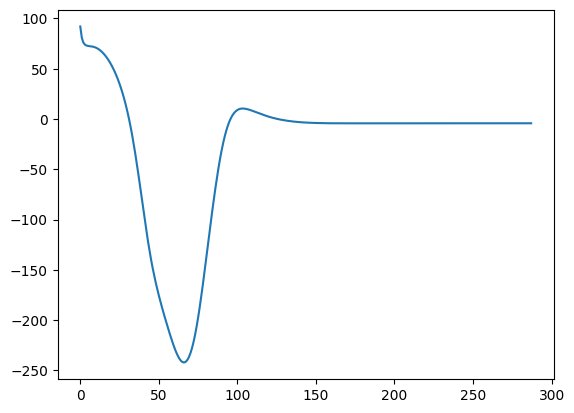

In [78]:
true_preds["Appliances"].plot()

<AxesSubplot:xlabel='date'>

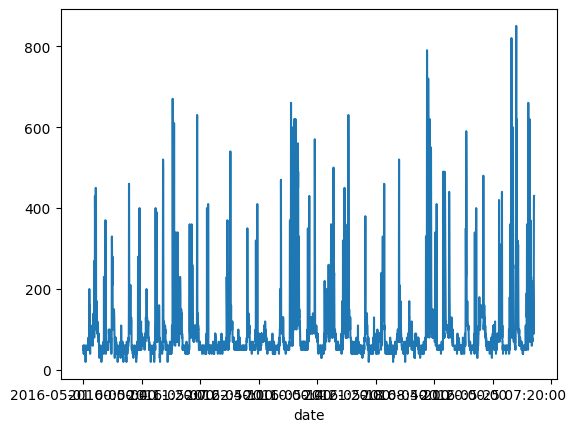

In [79]:
df["Appliances"].plot()

In [80]:
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.20,38.20,18.39,41.40,23.20,36.40,19.73,37.73,...,19.17,38.20,4.30,763.70,86.00,2.00,40.00,2.20,15.31,15.31
2016-05-01 00:10:00,60,0,21.15,38.17,18.39,41.50,23.13,36.47,19.70,37.66,...,19.13,38.29,4.28,763.72,86.33,2.17,38.17,2.22,11.24,11.24
2016-05-01 00:20:00,50,0,21.13,38.09,18.32,41.50,23.20,36.50,19.70,37.59,...,19.13,38.36,4.27,763.73,86.67,2.33,36.33,2.23,21.81,21.81
2016-05-01 00:30:00,50,0,21.10,38.09,18.29,41.50,23.20,36.50,19.70,37.50,...,19.17,38.50,4.25,763.75,87.00,2.50,34.50,2.25,47.00,47.00
2016-05-01 00:40:00,60,0,21.10,38.03,18.29,41.56,23.20,36.50,19.70,37.50,...,19.17,38.63,4.23,763.77,87.33,2.67,32.67,2.27,8.06,8.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,...,23.20,46.79,22.73,755.20,55.67,3.33,23.67,13.33,43.10,43.10
2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,...,23.20,46.79,22.60,755.20,56.00,3.50,24.50,13.30,49.28,49.28
2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,...,23.20,46.79,22.47,755.20,56.33,3.67,25.33,13.27,29.20,29.20


<AxesSubplot:xlabel='date'>

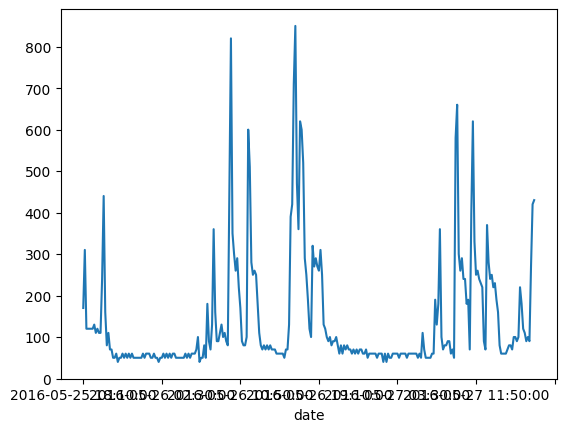

In [82]:
test["Appliances"].plot()